<a href="https://colab.research.google.com/github/Andrew97422/difference-schemes/blob/main/difference-schemes/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3


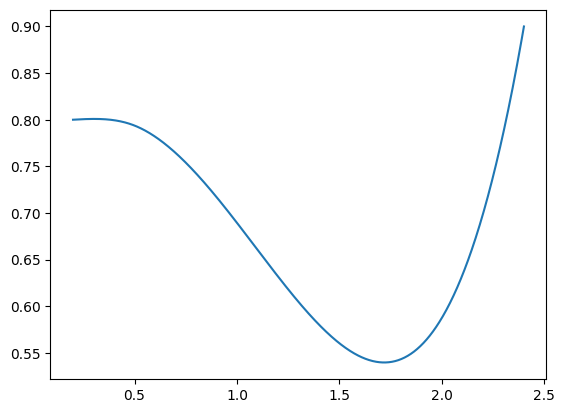

In [19]:
import numpy as np
import matplotlib.pyplot as plt

round = int(input())
n = 10 ** round

a = 0.2
b = 2.4
h = (b - a) / (n + 1)

x = [0] * (n + 2)

for i in range(n + 2):
  x[i] = a + i * h

f = [0] * (n + 2)
for i in range(n + 2):
  f[i] = 2 - np.abs(1 - 2 * x[i])

A = [0] * (n + 2)
B = [0] * (n + 2)
C = [0] * (n + 2)
a = [0] * (n + 2)
b = [0] * (n + 2)
c = [0] * (n + 2)

for i in range(n + 2):
  A[i] = np.log(1 + np.sqrt(4 + x[i]))
  B[i] = np.e ** (-x[i] / 4)
  C[i] = np.sqrt(3 - x[i] / 2)
  a[i] = -A[i] / h ** 2 - B[i] / (2 * h)
  b[i] = 2 * A[i] / h ** 2 + C[i]
  c[i] = -A[i] / h ** 2 + B[i] / (2 * h)

b[0] = 1
c[0] = 0
f[0] = 0.8

a[n + 1] = 0
b[n + 1] = 1
f[n + 1] = 0.9

alpha = [0] * (n + 2)
beta = [0] * (n + 2)
alpha[0] = -c[0] / b[0]
beta[0] = f[0] / b[0]
for i in range(1, n + 2):
  alpha[i] = (c[i] * (-1)) / (a[i] * alpha[i - 1] + b[i])
  beta[i] = (f[i] - a[i]* beta[i - 1]) / (a[i] * alpha[i - 1] + b[i])

u = [0] * (n + 2)
u[n + 1] = (f[n + 1] - a[n + 1] * beta[n]) / (a[n + 1] * alpha[n] + b[n + 1])
for i in range(n + 1):
  u[n - i] = alpha[n - i] * u[n + 1 - i] + beta[n - i]

plt.plot(x, u)
plt.show()